# Cat vs Dog Image Classification (CNN)

## A general CNN architecture

![CNN architecture](https://miro.medium.com/v2/resize:fit:1400/1*d_xC3OqjOCYQtMfLawxzgg.png)

In [1]:
"""Importing Imp Libraries"""
import os
from PIL import Image
import random

import numpy as np
import tensorflow as tf


from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


## Keras's Sequential Class:
The Sequential class in Keras is used to create a neural network where each layer has exactly one input and one output. Layers in a Sequential model are arranged in a linear stack, and you can add one layer at a time using the .add() method.

# Read The Data

## The very first thing we will do is load/read this dataset, and then get some additional information about the dataset before displaying the Image data.

### We will read the data in 3 different way

In [2]:
# define the dir path of train and test

train_dir= "/kaggle/input/dogs-vs-cats/train"
test_dir = "/kaggle/input/dogs-vs-cats/test"


In [3]:
# let's check the train dir
x = os.listdir(train_dir)
print("Inside the train dir: ", x)


# now we will find out the num of data inside each of the dog and cat folder

#dogs fol
dogs = len(os.listdir(os.path.join(train_dir, "dogs")))
print("num of dog images in train_dir's dogs fol: ", dogs)

#cats fol
cats = len(os.listdir(os.path.join(train_dir, "cats")))
print("num of cat images in train_dir's cats fol: ", cats)


Inside the train dir:  ['dogs', 'cats']
num of dog images in train_dir's dogs fol:  10000
num of cat images in train_dir's cats fol:  10000


### Using indexing-slicling

In [4]:
# let see what in inside the dogs and the cats dir
dog_data = os.listdir(os.path.join(train_dir,"dogs")) 
cat_data = os.listdir(os.path.join(train_dir, "cats"))


# let's slice it
n = 5
sample_dog_data = dog_data[:n]
sample_cat_data = cat_data[:n]

#now it's time to print
print("this is dog what inside the dog_data: ",sample_dog_data)
print("this is dog what inside the dog_data: ",sample_cat_data)


this is dog what inside the dog_data:  ['dog.3443.jpg', 'dog.7971.jpg', 'dog.10728.jpg', 'dog.1942.jpg', 'dog.3259.jpg']
this is dog what inside the dog_data:  ['cat.12461.jpg', 'cat.10176.jpg', 'cat.8194.jpg', 'cat.3498.jpg', 'cat.891.jpg']


### Using Enumerate() function

In [5]:
# Now let's use enumerate()

dog_data 
cat_data 
n = 5

for i,v in enumerate(dog_data[:n]):
    print("Inside Dog dir: ", v)

print('\n')

for i, f in enumerate (cat_data[:n]):
    print("Inside Cat dir: ",f)

Inside Dog dir:  dog.3443.jpg
Inside Dog dir:  dog.7971.jpg
Inside Dog dir:  dog.10728.jpg
Inside Dog dir:  dog.1942.jpg
Inside Dog dir:  dog.3259.jpg


Inside Cat dir:  cat.12461.jpg
Inside Cat dir:  cat.10176.jpg
Inside Cat dir:  cat.8194.jpg
Inside Cat dir:  cat.3498.jpg
Inside Cat dir:  cat.891.jpg


### Using range() function:

In [6]:
# now let's use range() to read the data

n =5
for j in range(len(dog_data[:n])):
    print(dog_data[j])

print('\n')
for i in range(len(cat_data[:n])):
    print(cat_data[i])

dog.3443.jpg
dog.7971.jpg
dog.10728.jpg
dog.1942.jpg
dog.3259.jpg


cat.12461.jpg
cat.10176.jpg
cat.8194.jpg
cat.3498.jpg
cat.891.jpg


# Display The Image Data 

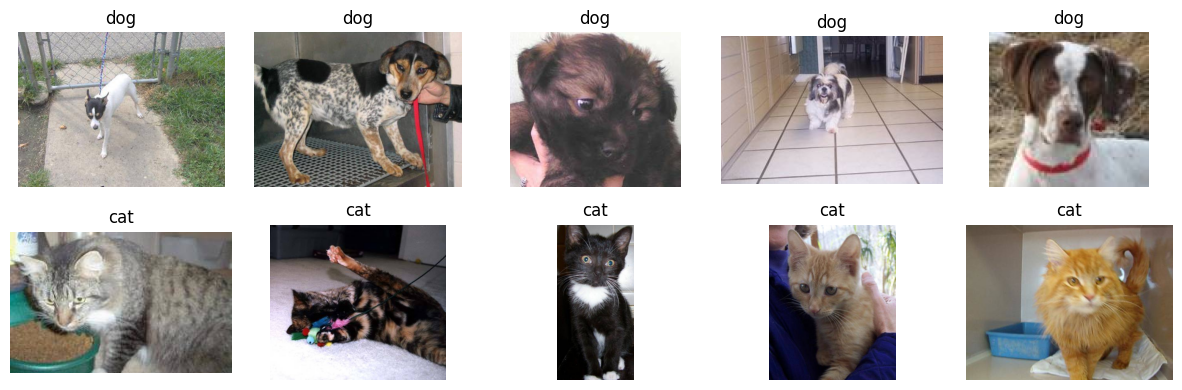

In [7]:
"""Display Some Image Data"""

dog_data = os.listdir(os.path.join(train_dir,"dogs")) 
cat_data = os.listdir(os.path.join(train_dir, "cats"))

def display_images(dog,cat,num_of_images=5):

    # here we are randomly selecting few images
    dog_image = random.sample(dog,num_of_images)
    cat_image = random.sample(cat,num_of_images)

    plt.figure(figsize=(12,4)) # creating dims for our figure. weidth=10 and height = 5

    
    for i in range(num_of_images):

        #for the dog
        plt.subplot(2,num_of_images,i+1) # we are creating subplot inside the figure. nrows,ncols,num_of_current_img
        img = Image.open(os.path.join(train_dir,"dogs", dog_image[i])) # storing the image inside img, by constructing the path
        plt.imshow(img)
        plt.title("dog")
        plt.axis('off')


        # for the cat
        plt.subplot(2,num_of_images,i+num_of_images+1)
        img = Image.open(os.path.join(train_dir,"cats", cat_image[i]))
        plt.imshow(img)
        plt.title("cat")
        plt.axis("off")

    plt.tight_layout() ## To make sure the subplots don't overlap
    plt.show()

display_images(dog_data,cat_data) 
        

# Prepare data using keras directory-based system

In [8]:
"""Let's create a generator/Data Loder"""
# for train
train_data = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/dogs-vs-cats/train",
    labels = "inferred",  # automatically infer the labels based on folders
    label_mode = 'int', # we want the labels in int 
    subset = 'training',
    validation_split = 0.2,
    batch_size = 32,
    image_size = (256, 256),
    seed = 123
    
)

# for validation
val_data = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/dogs-vs-cats/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split = 0.2,
    subset = 'validation',
    batch_size = 32,
    image_size = (256, 256),
    seed =123
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


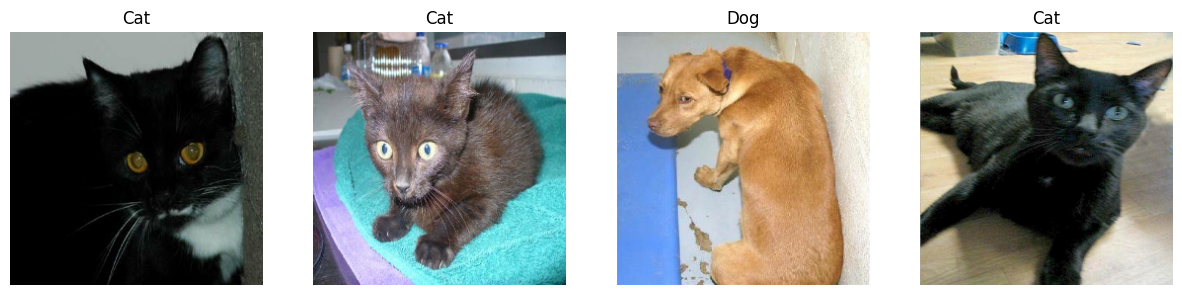

In [9]:

# Get a batch of images and labels from the training data
image_batch, label_batch = next(iter(train_data))

# Display the first 5 images in the batch
plt.figure(figsize=(15, 10))

for i in range(4):
    plt.subplot(1, 4, i + 1)  # Create a subplot for each image
    plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert the tensor to a numpy array and display the image
    plt.title('Cat' if label_batch[i].numpy() == 0 else 'Dog')  # Set the title based on the label
    plt.axis('off')  # Turn off the axis to make the image clearer

plt.show()


In [10]:
image_batch.shape

TensorShape([32, 256, 256, 3])

In [11]:
label_batch.shape

TensorShape([32])

In [12]:
"""Preprocessing"""
# applying normalization

def norm(image, label):
    image = tf.cast(image/255. , tf.float32) # normalize the pixel values to the range of [0.0, 1.0]
    return image,label

# applying norm on the dataset
train_data = train_data.map(norm)
val_data = val_data.map(norm)

## Model Architecture


In [13]:

from keras.layers import Dropout

# creating the model architecture

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding ='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size =(2,2), strides=2,padding='valid'))


 
model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size =(2,2), strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size =(2,2), strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))

# Output layer
model.add(Dense(1,activation='sigmoid'))
        

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

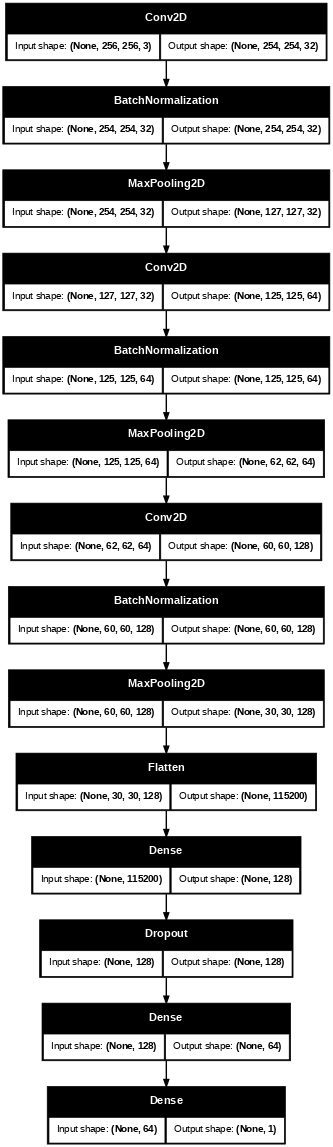

In [15]:
plot_model(model, show_shapes = True, dpi =50)

In [16]:
"""Now let's compile the model"""

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [17]:
history = model.fit(train_data,epochs=25, validation_data=val_data)

Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.5378 - loss: 3.2156 - val_accuracy: 0.5375 - val_loss: 0.7294
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.5591 - loss: 0.6811 - val_accuracy: 0.6087 - val_loss: 0.6615
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.5802 - loss: 0.6665 - val_accuracy: 0.6405 - val_loss: 0.6116
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.5967 - loss: 0.6472 - val_accuracy: 0.5508 - val_loss: 0.6756
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.6054 - loss: 0.6473 - val_accuracy: 0.6572 - val_loss: 0.5993
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.6263 - loss: 0.6319 - val_accuracy: 0.6892 - val_loss: 0.6084
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.6342 - loss: 0.6161 - val_accuracy: 0.7115 - val_loss: 0.5605
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.6541 - loss: 0.6121 - 

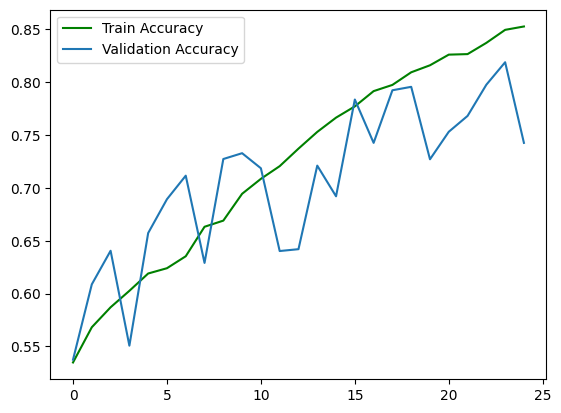

In [18]:
"""from the info we can already see that the model is overfitted but let's go and plot it"""

plt.plot(history.history['accuracy'], label= 'Train Accuracy',color ='green')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

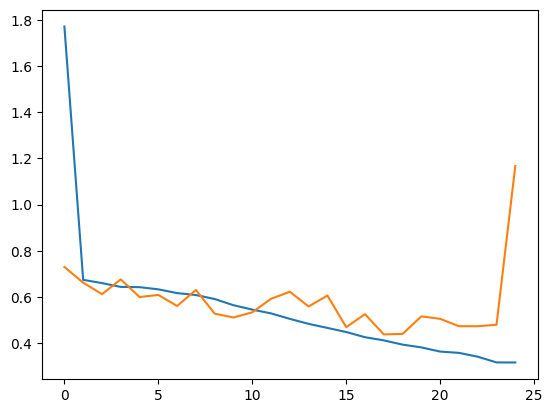

In [19]:
plt.plot(history.history['loss'],label ='train loss')
plt.plot(history.history['val_loss'],label= 'validation loss')